# The Hydrogen Atom

You will learn how to use *Psi4* by putting your hands on a simple
example: The total energy of the hydrogen atom in Hartree-Fock theory.
This is a tutorial - you are not only invited to type the commands that
are being introduced, you are obliged to.

## Electronic Structure Software

*Ab initio* electronic structure software packages make it possible to
calculate numerically a variety of properties of a given system, based
only on physical constants and the system's Hamiltonian. The only
approximations that need to be made are in the method and basis set that
have to be chosen, in order to allow for a reasonable computational
time. (The stronger your workstation, the more approximations you may
drop, and the more elaborate your approach can be.) There are plenty of
*ab initio* quantum chemical packages on the market; they differ in
their capabilities, license policy and pricing. Widley used packages
include GAMESS US, turbomole, DALTON, CP2K, CPMD and the Gaussian set of
programs.

*Psi4* is a free and open-source ab initio electronic structure program providing implementations of Hartree–Fock, density functional theory, many-body perturbation theory, configuration interaction, density cumulant theory, symmetry-adapted perturbation theory, and coupled-cluster theory. Most of the methods are quite efficient, thanks to density fitting and multi-core parallelism. The program is a hybrid of C++ and Python, and calculations may be run with very simple text files or using the Python API, facilitating post-processing and complex workflows. [Reference: Smith DG, *et al.* PSI4 1.4: Open-source software for high-throughput quantum chemistry. *The Journal of chemical physics* (2020) DOI: https://doi.org/10.1063/5.0006002 ]

The current version of *Psi4*  that you will be using on [noto.epfl](https://noto.epfl.ch/) is v1.9.1. 

**! Always remember to select the `Computational Chemistry` kernel to have psi4 and other useful packages available**.

## Preliminary steps

Before starting to work with *Psi4* we need to set up the environment, importing the required modules:

In [2]:
import psi4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from helpers import *

then we can also set the maximum resources that can be used, specifying the available memory for *Psi4* to use with the `psi4.set_memory()` function, and the number of threads to use in SMP parallel computations with the `psi4.set_num_threads()` function

In [3]:
psi4.set_memory('2 GB')
psi4.set_num_threads(2)


  Memory set to   1.863 GiB by Python driver.
  Threads set to 2 by Python driver.


## Writing An Input For *Psi4* and Invoking the Program

The geomety of the $H$ atom can now be defined, passing it as a string into the `psi4.geometry()` function in either Z-matrix (see note below) or Cartesian format, where the triple-quote `"""string"""` syntax is used to allow the string to break over multiple lines. 

In [4]:
h = psi4.geometry("""
0 2
H 0.0 0.0 0.0
""")

:::{admonition} Atomic coordinates representation
:class: dropdown

* **Z-matrix**: each line gives the coordinates of a single atom in terms of its internal coordinates (atomic number, bond length, bond angle, and dihedral angle). As example, the Z-matrix for hydrogen peroxide is reported:

```
H
O 1 0.9
O 2 1.4 1 105.0
H 3 0.9 2 105.0 1 120.0
```

The first line defines the first atom, a H in this case. The next line defines the second atom, an O, and specifies the internuclear distance (0.9Å) with the first atom (1). The next line defines the third atom, another O, and specifies the internuclear distance (1.4Å) with the second atom (2) and the angle (105.0°) with atom 2 and atom 1 (O-O-H angle). The last line defines the fourth atom, another H,  and specifies the internuclear distance (0.9Å) with the third atom (3), the angle (105.0°) with atom 3 and atom 2 (H-O-O angle), and the dihedral angle  (120.0°) with atom 3, 2, and 1 (H-O-O-H angle).\
Note that if more atoms would be present, it would be needed to specify for each of them the value for  internuclear distance, angle and dihedral with other atoms previously defined.


* **Cartesian coordinates**: each line gives the $x$, $y$, and $z$ coordinates of a single atom, with respect to the origin of the cartesian axes. The Cartesian coordinates for hydrogen peroxide result:

```
H 0.000 0.000 0.000
O 0.900 0.000 0.000
O 1.262 1.352 0.000
H 1.742 1.465 0.753
```
Note that Z-matrices can be converted to Cartesian coordinates and back, as the structural information content is identical.
:::

Where the first line contains the total charge of the system (0), followed by the spin multiplicity (2), and the following lines contain all the atoms of your system, one atom per line. In this case, our molecule is composed of a single hydrogen atom, so we have a single line.

You can visualize a 3D representation of your molecule using the `drawXYZ` function imported from the `helpers` we provide. In this case you will not see something particularly exciting, but it is always a good practice to have a visual look at your structures, to check that everything looks as expected. 

In [5]:
drawXYZ(h)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

We can compute the energy of the system using the function `psi4.energy()`, passing as first argument a string with the desired method and the basis set (`'METHOD/BASIS'`), and the target molecule as second argument. The ouput is the total electronic energy in Hartree. For this exercise we will use the unrestricted Hartree Fock method. You will see this method in detail during future lectures and exercises and you will get familiar with it (for now it is sufficient to know we are using *a method*, with a particular basis set).

Calling `psi4.energy()` will perform a so-called **single point calculation** and will not change the geometry. During the calculation the program will perform a wavefunction optimization to find the lowest energy combination of wavefunction coefficients. 

We will save in separate log files the output of the calculations and we will store the energy value and print it in the next cell.

In [6]:
basissets = ['STO-3G', '6-31G', '6-311G'] # these are the basis sets we are going to use

psi4.set_options({'reference':'UHF'}) # We are using Unrestriced Hartee Fock method

for basis in basissets:
    psi4.core.set_output_file(f'{basis}-h-output.log', False) # save in seperate log files
    E = psi4.energy(f'hf/{basis}', molecule=h)  # we do the single point energy calculation once per basis set

    print(basis, E)

STO-3G -0.4665818495572754
6-31G -0.49823291072906983
6-311G -0.49980981527328244


To verify the number of basis sets used, navigate to the appropriate output log file located in your file directory (lefthand side of page). You can use the CTRL+F search function to look for the phrase "Number of basis functions" and read under the section called "Primary Basis." 

```{admonition} Exercise 7
:class: exercise 
Include a table of the the calculated energies using the three different basis sets, specifying for each of them the number of basis functions used. Compare the energies with the analytical value for the H atom, given by the analytical expression: 

$$
 E = -\frac{1}{2} m_e c^2\alpha^2,
$$

where $\alpha$ is the fine structure constant. 

$$\begin{align}
m_e = 0.910953\cdot10^{-30} kg\\
c = 2.99792458\cdot10^8 m s^{-1}\\
\alpha = 7.2973525376\cdot10^{-3}\\
N_A = 6.0221367\cdot10^{23}mol^{-1}
\end{align}$$
Pay attention to the units - use atomic units or kcal$\cdot$mol$^{-1}$ throughout!
```

```{admonition} Exercise 8
:class: exercise 
What is the influence of the basis set size on the accuracy of the result? How do the split-valence bases compare to STO-3G?
```

## Your turn: Compute the Hartree-Fock energy of the helium atom

Similarly as just seen for the hydrogen atom, you will now compute the energy for a single helium atom. We will use the same UHF method and the same basis sets, enabling us to compare the resulting energies with the ones from the hydrogen case. First, you will need to define the geometry information of your single helium atom:

In [7]:
he = psi4.geometry("""
0 1
He 0.0 0.0 0.0
""")

In [8]:
drawXYZ(he)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Using this geometry input, we can calculate the Hartree-Fock energy using the same basis sets as before and the same method (UHF):

In [9]:
basissets = ['STO-3G', '6-31G', '6-311G'] # these are the basis sets we are going to use

psi4.set_options({'reference':'UHF'}) # We are using Unrestriced Hartee Fock

for basis in basissets:
    psi4.core.set_output_file(f'{basis}-he-output.log', False) # save in seperate log files
    E = psi4.energy(f'hf/{basis}', molecule=he)#COMPUTE HERE YOUR ENERGIES  # we do the single point energy calculation once per basis set

    print(basis, E)

STO-3G -2.80791335449294
6-31G -2.855179033592206
6-311G -2.8599178781869092


```{admonition} Exercise 9
:class: exercise 
How does the resulting relative energies for helium compare to the hydrogen case? And why?
```

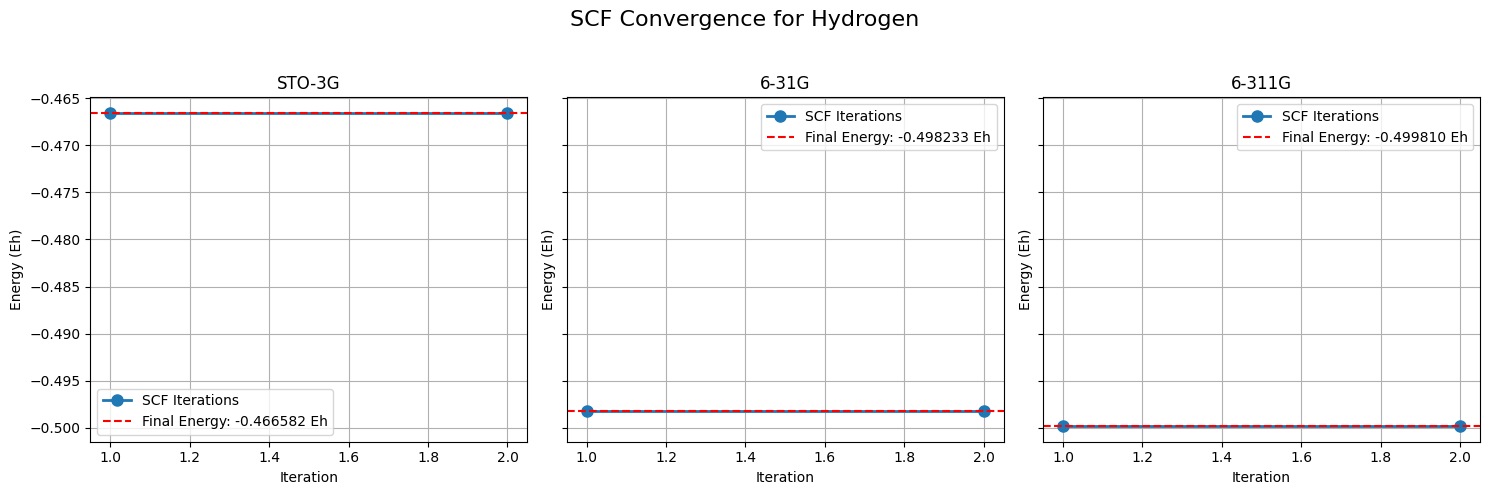

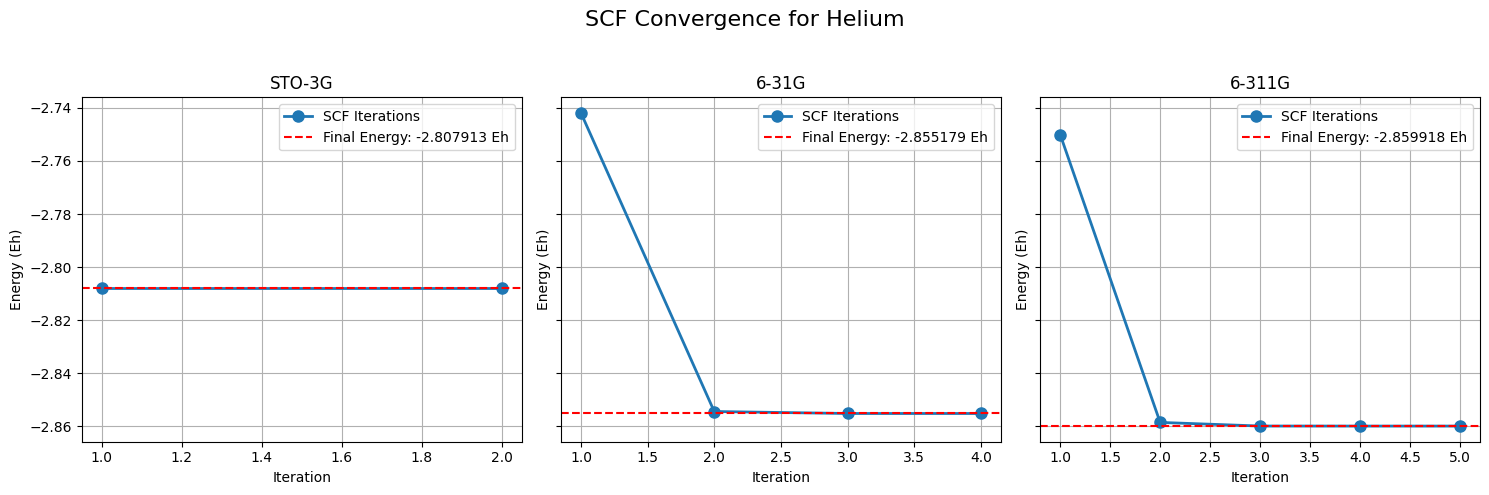

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from output files
hydrogen_data = {
    'STO-3G': [-0.46658184955728, -0.46658184955728],
    '6-31G': [-0.49823291072907, -0.49823291072907],
    '6-311G': [-0.49980981527328, -0.49980981527328]
}

helium_data = {
    'STO-3G': [-2.80791335449294, -2.80791335449294],
    '6-31G': [-2.74191412154510, -2.85442978281775, -2.85517895886954, -2.85517903359221],
    '6-311G': [-2.75004159092775, -2.85854129939373, -2.85990189260660, -2.85991786912620, -2.85991787818691]
}

# Function to plot SCF convergence
def plot_scf_convergence(atom_name, data, final_energies):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    fig.suptitle(f'SCF Convergence for {atom_name}', fontsize=16)
    
    for idx, basis in enumerate(data.keys()):
        energies = data[basis]
        iterations = list(range(1, len(energies) + 1))
        final_energy = final_energies[basis]
        
        # Plot iteration energies
        axes[idx].plot(iterations, energies, 'o-', label='SCF Iterations', markersize=8, linewidth=2)
        # Plot final energy as horizontal line
        axes[idx].axhline(y=final_energy, color='r', linestyle='--', label=f'Final Energy: {final_energy:.6f} Eh')
        
        axes[idx].set_title(basis)
        axes[idx].set_xlabel('Iteration')
        axes[idx].set_ylabel('Energy (Eh)')
        axes[idx].legend()
        axes[idx].grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Final energies for reference
hydrogen_final = {
    'STO-3G': -0.46658184955728,
    '6-31G': -0.49823291072907,
    '6-311G': -0.49980981527328
}

helium_final = {
    'STO-3G': -2.80791335449294,
    '6-31G': -2.85517903359221,
    '6-311G': -2.85991787818691
}

# Generate plots
plot_scf_convergence('Hydrogen', hydrogen_data, hydrogen_final)
plot_scf_convergence('Helium', helium_data, helium_final)